# Enrichment functions in XFEM

In [1]:
from __future__ import division, print_function
from numpy import mgrid, pi, sqrt, sin, cos, arctan, arctan2, tan
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline
plt.style.use("seaborn-notebook")
plot_args = {'rstride': 1, 'cstride': 1, 'cmap':"viridis",
             'linewidth': 0.3, 'antialiased': True,
             'alpha': 0.5}

## Isotropic case

The asymptotic near crack tip displacement field can be expressed by the following basis functions

$$\{p_1, p_2, p_3, p_4\} = \left\{\sqrt{r}\sin\frac{\theta}{2}, \sqrt{r}\cos\frac{\theta}{2},
   \sqrt{r}\sin\theta\sin\frac{\theta}{2}, \sqrt{r}\sin\theta\cos\frac{\theta}{2}\right\}$$

In [3]:
x, y = mgrid[-1:1:51j, -1:1:51j]
r = sqrt(x**2 + y**2)
th = arctan2(y, x) + pi

In [4]:
p = [sqrt(r)*sin(th/2),
     sqrt(r)*cos(th/2),
     sqrt(r)*sin(th)*sin(th/2),
     sqrt(r)*sin(th)*cos(th/2)]

Their plots look like

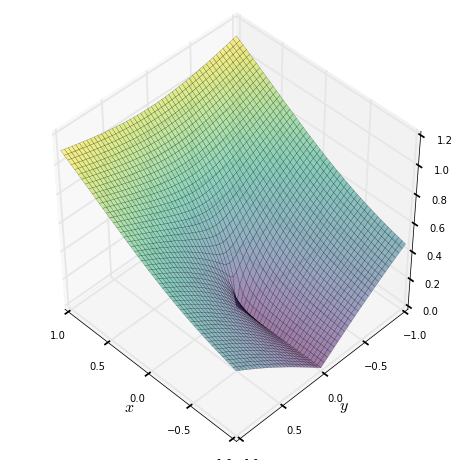

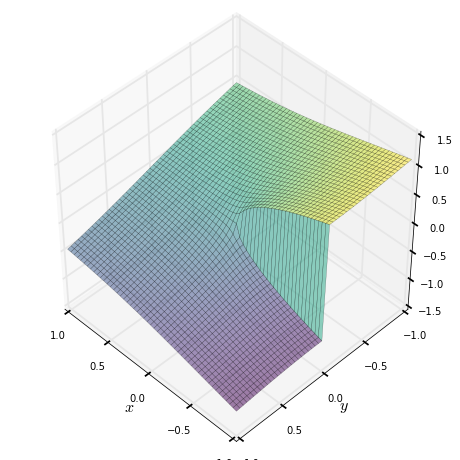

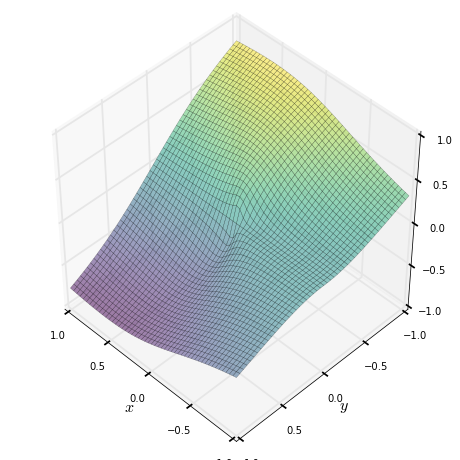

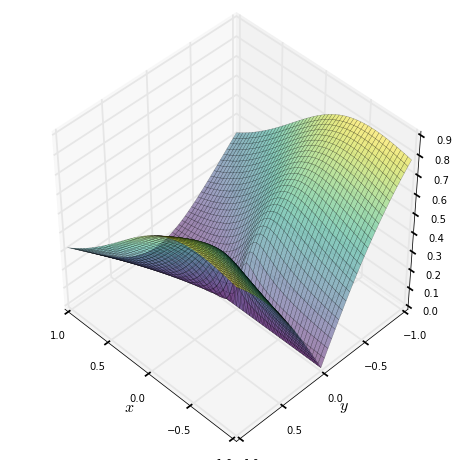

In [5]:
for cont in range(4):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, p[cont], **plot_args)
    ax.view_init(azim=135, elev=45)
    ax.set_xlabel(r"$x$",fontsize=16)
    ax.set_ylabel(r"$y$",fontsize=16)
plt.show()

## Anisotropic case

### Case I

In [6]:
c11, c12, c22, c66 = 235, 3.69, 26, 28.2

In [7]:
e = [sqrt(0.5 * (c66/c11 + c22/c66 - (c12 + c66)**2/(c11*c66)) -
          sqrt(0.25*(c66/c11 + c22/c66 - (c12 + c66)**2/(c11*c66))**2 - c22/c11)),
     sqrt(0.5 * (c66/c11 + c22/c66 - (c12 + c66)**2/(c11*c66)) +
          sqrt(0.25*(c66/c11 + c22/c66 - (c12 + c66)**2/(c11*c66))**2- c22/c11))]
g = [sqrt(cos(th)**2 + sin(th)**2/e[k]) for k in range(2)]
t = [arctan(tan(th)/e[k]) for k in range(2)]
p = [sqrt(r)*cos(t[0]/2)*sqrt(g[0]),
     sqrt(r)*cos(t[1]/2)*sqrt(g[1]),
     sqrt(r)*sin(t[0]/2)*sqrt(g[0]),
     sqrt(r)*sin(t[1]/2)*sqrt(g[1])]

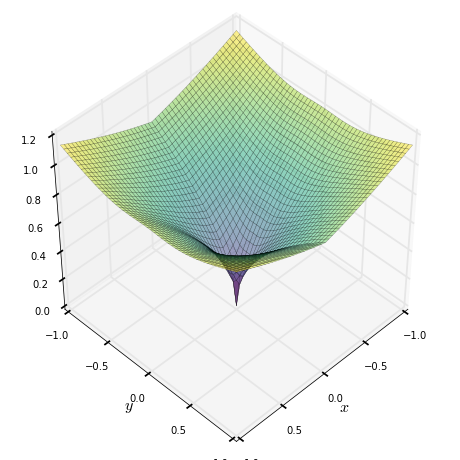

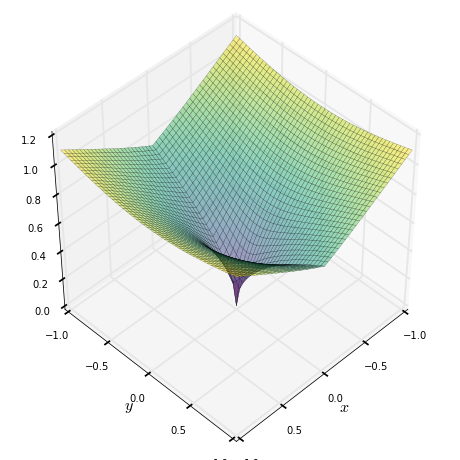

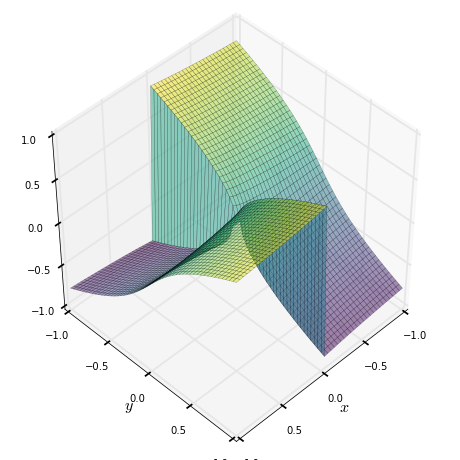

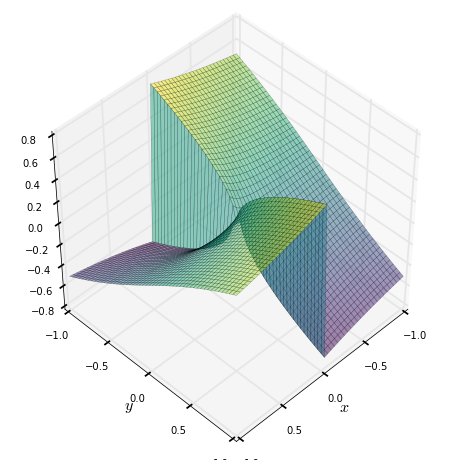

In [8]:
for cont in range(4):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, p[cont], **plot_args)
    ax.view_init(azim=45, elev=45)
    ax.set_xlabel(r"$x$",fontsize=16)
    ax.set_ylabel(r"$y$",fontsize=16)
plt.show()

## References

1. Melenk, Jens M., and Ivo Babuška. "The partition of unity finite element method: basic theory and applications." Computer methods in applied mechanics and engineering 139.1 (1996): 289-314.
2. Dolbow, J. O. H. N., and Ted Belytschko. "A finite element method for crack growth without remeshing." International journal for numerical methods in engineering 46.1 (1999): 131-150.
3. Asadpoure, A., and S. Mohammadi. "Developing new enrichment functions for crack simulation in orthotropic media by the extended finite element method." International Journal for Numerical Methods in Engineering 69.10 (2007): 2150-2172.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()